In [64]:
import pandas as pd
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import GRU

In [527]:
# load dataset
df3 = pd.read_excel('hpg_new.xlsx', parse_dates=['Date/Time'], index_col='Date/Time').drop('Ticker', 1)
df3

,Open,High,Low,Close,Volume
Date/Time,,,,,
2008-01-17,10.09,10.09,9.71,9.71,158820
2008-01-18,9.51,9.90,9.51,9.90,141170
2008-01-21,9.80,9.90,9.71,9.71,71040
2008-01-22,9.41,9.51,9.41,9.41,83260
2008-01-23,9.32,9.32,8.98,8.98,119690
2008-01-24,9.32,9.32,9.03,9.03,95130
2008-01-25,8.98,9.12,8.98,9.03,82650
2008-01-28,9.22,9.22,9.03,9.08,41020
2008-01-29,9.12,9.27,9.12,9.27,120000


In [528]:
df3 = df3.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df3

,Open,High,Low,Close,Volume
Date/Time,,,,,
2008-01-17,10.09,10.09,9.71,9.71,158820
2008-01-18,9.51,9.90,9.51,9.90,141170
2008-01-21,9.80,9.90,9.71,9.71,71040
2008-01-22,9.41,9.51,9.41,9.41,83260
2008-01-23,9.32,9.32,8.98,8.98,119690
2008-01-24,9.32,9.32,9.03,9.03,95130
2008-01-25,8.98,9.12,8.98,9.03,82650
2008-01-28,9.22,9.22,9.03,9.08,41020
2008-01-29,9.12,9.27,9.12,9.27,120000


In [529]:
print df3.isnull().any().any()

False


In [530]:
values = df3.values
#ensure all data is float
values = values.astype('float32')

In [531]:
# normalize features
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)
scaled

array([[ 0.11238867,  0.11163242,  0.11333676,  0.10798353,  0.01153115],
       [ 0.10299596,  0.10855848,  0.10991269,  0.1111111 ,  0.01024967],
       [ 0.10769232,  0.10855848,  0.11333676,  0.10798353,  0.00515787],
       ..., 
       [ 0.93684214,  0.94175702,  0.96918339,  0.9539094 ,  0.2666823 ],
       [ 0.9190284 ,  0.92557842,  0.92295837,  0.88641971,  0.53126776],
       [ 0.80890685,  0.82203525,  0.85618895,  0.83539093,  0.61429179]], dtype=float32)

In [532]:
# frame as supervised learning
def series_to_supervised(data,n_in, n_out, dropnan, columns):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)

    cols, names = list(), list()
    # input sequence (t-n, ..., t- 1)
    for i in range (n_in, 0, -1):
        cols.append(df.shift(i))
        names += [str(columns[j]) + '(t-%d)' %i for j in range(n_vars)]
    # forecast sequence (t, t+1, ..., t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i ==0:
            names += [str(columns[j]) + '(t)' for j in range(n_vars)]
        else:
            names += [str(columns[j]) + '(t+%d)' %i for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# m=5 n=3

In [533]:
columns = list(df3)
# frame as supervised learning
reframed = series_to_supervised(scaled,5, 3, True, columns)
reframed

,Open(t-5),High(t-5),Low(t-5),Close(t-5),Volume(t-5),Open(t-4),High(t-4),Low(t-4),Close(t-4),Volume(t-4),...,Open(t+1),High(t+1),Low(t+1),Close(t+1),Volume(t+1),Open(t+2),High(t+2),Low(t+2),Close(t+2),Volume(t+2)
5,0.112389,0.111632,0.113337,0.107984,0.011531,0.102996,0.108558,0.109913,0.111111,0.010250,...,0.094413,0.095939,0.100839,0.096790,0.006001,0.098300,0.097557,0.101695,0.097613,0.002978
6,0.102996,0.108558,0.109913,0.111111,0.010250,0.107692,0.108558,0.113337,0.107984,0.005158,...,0.098300,0.097557,0.101695,0.097613,0.002978,0.096680,0.098366,0.103236,0.100741,0.008713
7,0.107692,0.108558,0.113337,0.107984,0.005158,0.101377,0.102249,0.108201,0.103045,0.006045,...,0.096680,0.098366,0.103236,0.100741,0.008713,0.106235,0.105485,0.109913,0.107984,0.026334
8,0.101377,0.102249,0.108201,0.103045,0.006045,0.099919,0.099175,0.100839,0.095967,0.008690,...,0.106235,0.105485,0.109913,0.107984,0.026334,0.098300,0.102249,0.104948,0.104691,0.005980
9,0.099919,0.099175,0.100839,0.095967,0.008690,0.099919,0.099175,0.101695,0.096790,0.006907,...,0.098300,0.102249,0.104948,0.104691,0.005980,0.107692,0.106941,0.111625,0.109465,0.013968
10,0.099919,0.099175,0.101695,0.096790,0.006907,0.094413,0.095939,0.100839,0.096790,0.006001,...,0.107692,0.106941,0.111625,0.109465,0.013968,0.109312,0.108558,0.111625,0.107984,0.007608
11,0.094413,0.095939,0.100839,0.096790,0.006001,0.098300,0.097557,0.101695,0.097613,0.002978,...,0.109312,0.108558,0.111625,0.107984,0.007608,0.104615,0.103867,0.108201,0.103045,0.010942
12,0.098300,0.097557,0.101695,0.097613,0.002978,0.096680,0.098366,0.103236,0.100741,0.008713,...,0.104615,0.103867,0.108201,0.103045,0.010942,0.101377,0.102249,0.108201,0.103868,0.007455
13,0.096680,0.098366,0.103236,0.100741,0.008713,0.106235,0.105485,0.109913,0.107984,0.026334,...,0.101377,0.102249,0.108201,0.103868,0.007455,0.101377,0.101440,0.108201,0.103045,0.013383
14,0.106235,0.105485,0.109913,0.107984,0.026334,0.098300,0.102249,0.104948,0.104691,0.005980,...,0.101377,0.101440,0.108201,0.103045,0.013383,0.094413,0.095130,0.100839,0.096790,0.015174


In [534]:
# drop columns we dont want to predict
drop_list = [25,26,27,28,29,30,31,32,33,34,35,36,37,39]
reframed.drop(reframed.columns[drop_list], axis=1, inplace=True)
reframed

,Open(t-5),High(t-5),Low(t-5),Close(t-5),Volume(t-5),Open(t-4),High(t-4),Low(t-4),Close(t-4),Volume(t-4),...,High(t-2),Low(t-2),Close(t-2),Volume(t-2),Open(t-1),High(t-1),Low(t-1),Close(t-1),Volume(t-1),Close(t+2)
5,0.112389,0.111632,0.113337,0.107984,0.011531,0.102996,0.108558,0.109913,0.111111,0.010250,...,0.102249,0.108201,0.103045,0.006045,0.099919,0.099175,0.100839,0.095967,0.008690,0.097613
6,0.102996,0.108558,0.109913,0.111111,0.010250,0.107692,0.108558,0.113337,0.107984,0.005158,...,0.099175,0.100839,0.095967,0.008690,0.099919,0.099175,0.101695,0.096790,0.006907,0.100741
7,0.107692,0.108558,0.113337,0.107984,0.005158,0.101377,0.102249,0.108201,0.103045,0.006045,...,0.099175,0.101695,0.096790,0.006907,0.094413,0.095939,0.100839,0.096790,0.006001,0.107984
8,0.101377,0.102249,0.108201,0.103045,0.006045,0.099919,0.099175,0.100839,0.095967,0.008690,...,0.095939,0.100839,0.096790,0.006001,0.098300,0.097557,0.101695,0.097613,0.002978,0.104691
9,0.099919,0.099175,0.100839,0.095967,0.008690,0.099919,0.099175,0.101695,0.096790,0.006907,...,0.097557,0.101695,0.097613,0.002978,0.096680,0.098366,0.103236,0.100741,0.008713,0.109465
10,0.099919,0.099175,0.101695,0.096790,0.006907,0.094413,0.095939,0.100839,0.096790,0.006001,...,0.098366,0.103236,0.100741,0.008713,0.106235,0.105485,0.109913,0.107984,0.026334,0.107984
11,0.094413,0.095939,0.100839,0.096790,0.006001,0.098300,0.097557,0.101695,0.097613,0.002978,...,0.105485,0.109913,0.107984,0.026334,0.098300,0.102249,0.104948,0.104691,0.005980,0.103045
12,0.098300,0.097557,0.101695,0.097613,0.002978,0.096680,0.098366,0.103236,0.100741,0.008713,...,0.102249,0.104948,0.104691,0.005980,0.107692,0.106941,0.111625,0.109465,0.013968,0.103868
13,0.096680,0.098366,0.103236,0.100741,0.008713,0.106235,0.105485,0.109913,0.107984,0.026334,...,0.106941,0.111625,0.109465,0.013968,0.109312,0.108558,0.111625,0.107984,0.007608,0.103045
14,0.106235,0.105485,0.109913,0.107984,0.026334,0.098300,0.102249,0.104948,0.104691,0.005980,...,0.108558,0.111625,0.107984,0.007608,0.104615,0.103867,0.108201,0.103045,0.010942,0.096790


In [535]:
# split data
values = reframed.values
n_train = int(len(values) * 0.7)
n_val = int(len(values) * 0.2)

train = values[:n_train, :]
val = values[n_train:n_train+n_val, :]
test = values[n_train+n_val:, :]

# split input and output
train_X, train_y = train[:, :-1], train[:, -1:]
val_X, val_y = val[:, :-1], val[:, -1:]
test_X, test_y = test[:, :-1], test[:, -1:]

In [536]:
# reshape input tobe [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], 1))
val_X = val_X.reshape((val_X.shape[0], val_X.shape[1], 1))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], 1))
print train_X.shape, train_y.shape, val_X.shape, val_y.shape, test_X.shape, test_y.shape

(1749, 25, 1) (1749, 1) (499, 25, 1) (499, 1) (251, 25, 1) (251, 1)


In [537]:
# network
import keras
from keras import regularizers
model = Sequential()
model.add(GRU(64, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
#opt = keras.optimizers.Adagrad(lr=0.0001)
model.compile(loss='mae', optimizer='Adagrad')

In [486]:
# network
from keras.layers.core import Dense, Dropout, Activation
model = Sequential()
model.add(GRU(128, return_sequences=True, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
#model.add(Dropout(0.2))
model.add(GRU(128, return_sequences=False, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mae', optimizer='AdaGrad')

In [538]:
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=32, validation_data=(val_X, val_y))

Train on 1749 samples, validate on 499 samples
Epoch 1/100
1749/1749 [==============================] - 5s - loss: 0.0199 - val_loss: 0.0110
Epoch 2/100
1749/1749 [==============================] - 1s - loss: 0.0077 - val_loss: 0.0096
Epoch 3/100
1749/1749 [==============================] - 1s - loss: 0.0059 - val_loss: 0.0112
Epoch 4/100
1749/1749 [==============================] - 1s - loss: 0.0054 - val_loss: 0.0084
Epoch 5/100
1749/1749 [==============================] - 1s - loss: 0.0052 - val_loss: 0.0082
Epoch 6/100
1749/1749 [==============================] - 1s - loss: 0.0053 - val_loss: 0.0091
Epoch 7/100
1749/1749 [==============================] - 1s - loss: 0.0052 - val_loss: 0.0105
Epoch 8/100
1749/1749 [==============================] - 1s - loss: 0.0052 - val_loss: 0.0082
Epoch 9/100
1749/1749 [==============================] - 1s - loss: 0.0049 - val_loss: 0.0088
Epoch 10/100
1749/1749 [==============================] - 1s - loss: 0.0051 - val_loss: 0.0098
Epoch 11/100

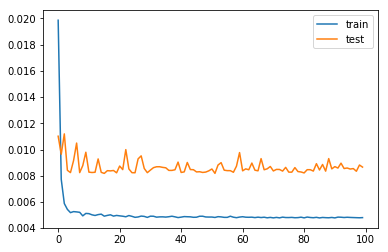

In [539]:
# plot
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [540]:
from sklearn.metrics import mean_absolute_error
# make prediction
test_predict = model.predict(test_X)
# normalize
ai = df3['Close'].values.reshape(-1,1)
scaler_ai = MinMaxScaler(feature_range=(0,1))
scaled_ai = scaler_ai.fit_transform(ai)
#invert scaling for forecast
inv_test_predict = scaler_ai.inverse_transform(test_predict.reshape(-1,1))
inv_test_y = scaler_ai.inverse_transform(test_y.reshape(-1,1))
# calculate MAE
mae = mean_absolute_error(inv_test_y, inv_test_predict)
print 'Test MAE: ', mae

Test MAE:  1.15663


In [541]:
test_predict

array([[ 0.39512902],
       [ 0.39703986],
       [ 0.40089187],
       [ 0.39830866],
       [ 0.40397936],
       [ 0.40811825],
       [ 0.4063572 ],
       [ 0.40387234],
       [ 0.39518291],
       [ 0.35993877],
       [ 0.36565298],
       [ 0.3547374 ],
       [ 0.35481426],
       [ 0.35884011],
       [ 0.3577404 ],
       [ 0.35755584],
       [ 0.36012822],
       [ 0.36798593],
       [ 0.36447811],
       [ 0.36883569],
       [ 0.37037981],
       [ 0.37064499],
       [ 0.37477174],
       [ 0.37547407],
       [ 0.37458295],
       [ 0.37946153],
       [ 0.37466052],
       [ 0.37666789],
       [ 0.37252247],
       [ 0.37481636],
       [ 0.38621911],
       [ 0.38203862],
       [ 0.3843362 ],
       [ 0.38756657],
       [ 0.38820535],
       [ 0.38570288],
       [ 0.38727215],
       [ 0.39779598],
       [ 0.40813538],
       [ 0.42887264],
       [ 0.43726614],
       [ 0.42431715],
       [ 0.42883757],
       [ 0.43373245],
       [ 0.4351854 ],
       [ 0

In [542]:
inv_test_predict

array([[ 27.15408707],
       [ 27.27017021],
       [ 27.50418091],
       [ 27.34724998],
       [ 27.69174576],
       [ 27.94318199],
       [ 27.83619881],
       [ 27.68524361],
       [ 27.15736008],
       [ 25.01627922],
       [ 25.36341858],
       [ 24.7002964 ],
       [ 24.70496559],
       [ 24.94953537],
       [ 24.88272858],
       [ 24.87151718],
       [ 25.02778816],
       [ 25.50514412],
       [ 25.29204369],
       [ 25.55676651],
       [ 25.65057182],
       [ 25.66668129],
       [ 25.91738319],
       [ 25.96004868],
       [ 25.9059124 ],
       [ 26.20228767],
       [ 25.91062546],
       [ 26.0325737 ],
       [ 25.78073883],
       [ 25.92009354],
       [ 26.61281013],
       [ 26.35884476],
       [ 26.49842262],
       [ 26.69466782],
       [ 26.73347473],
       [ 26.58144951],
       [ 26.67678261],
       [ 27.31610489],
       [ 27.9442234 ],
       [ 29.20401192],
       [ 29.71391678],
       [ 28.92726707],
       [ 29.20188141],
       [ 29

In [543]:
inv_test_y

array([[ 27.6799984 ],
       [ 27.9299984 ],
       [ 28.14999962],
       [ 28.1799984 ],
       [ 27.89999962],
       [ 27.64999962],
       [ 26.20999718],
       [ 26.37000084],
       [ 25.08999825],
       [ 25.33999825],
       [ 25.25      ],
       [ 25.12000084],
       [ 24.96999741],
       [ 25.52999878],
       [ 26.20999718],
       [ 25.58999825],
       [ 25.70999908],
       [ 25.70999908],
       [ 25.75      ],
       [ 26.20999718],
       [ 26.28000069],
       [ 26.28000069],
       [ 26.24999809],
       [ 25.93000031],
       [ 26.08999825],
       [ 25.78000069],
       [ 26.12000084],
       [ 26.73999977],
       [ 26.45999718],
       [ 26.68000031],
       [ 26.86999893],
       [ 26.86999893],
       [ 26.80999756],
       [ 27.09000015],
       [ 28.04000092],
       [ 28.60000038],
       [ 29.90999985],
       [ 30.23999977],
       [ 29.43999863],
       [ 29.81999969],
       [ 29.90999985],
       [ 29.86000061],
       [ 29.57999802],
       [ 29

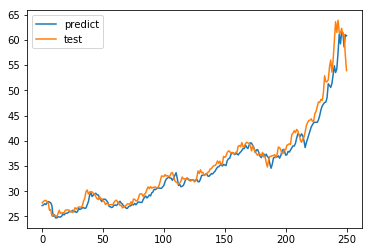

In [544]:
# plot
from matplotlib import pyplot
pyplot.plot(inv_test_predict, label='predict')
pyplot.plot(inv_test_y, label='test')
pyplot.legend()
pyplot.show()

In [545]:
# split data
values = reframed.values
n_train = int(len(values) * 0.7)
n_val = int(len(values) * 0.2)

train = values[:n_train, :]
val = values[n_train:n_train+n_val, :]
test = values[n_train+n_val:, :]

# split input and output
train_X, train_y = train[:, :-1], train[:, -1:]
val_X, val_y = val[:, :-1], val[:, -1:]
test_X, test_y = test[:, :-1], test[:, -1:]

In [546]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [547]:
regr.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [548]:
from sklearn.metrics import mean_absolute_error
# make prediction
test_predict = regr.predict(test_X)
# normalize
ai = df3['Close'].values.reshape(-1,1)
scaler_ai = MinMaxScaler(feature_range=(0,1))
scaled_ai = scaler_ai.fit_transform(ai)
#invert scaling for forecast
inv_test_predict = scaler_ai.inverse_transform(test_predict.reshape(-1,1))
inv_test_y = scaler_ai.inverse_transform(test_y.reshape(-1,1))
# calculate MAE
mae = mean_absolute_error(inv_test_y, inv_test_predict)
print 'Test MAE: ', mae

Test MAE:  1.01515099069


In [549]:
inv_test_y

array([[ 27.6799984 ],
       [ 27.9299984 ],
       [ 28.14999962],
       [ 28.1799984 ],
       [ 27.89999962],
       [ 27.64999962],
       [ 26.20999718],
       [ 26.37000084],
       [ 25.08999825],
       [ 25.33999825],
       [ 25.25      ],
       [ 25.12000084],
       [ 24.96999741],
       [ 25.52999878],
       [ 26.20999718],
       [ 25.58999825],
       [ 25.70999908],
       [ 25.70999908],
       [ 25.75      ],
       [ 26.20999718],
       [ 26.28000069],
       [ 26.28000069],
       [ 26.24999809],
       [ 25.93000031],
       [ 26.08999825],
       [ 25.78000069],
       [ 26.12000084],
       [ 26.73999977],
       [ 26.45999718],
       [ 26.68000031],
       [ 26.86999893],
       [ 26.86999893],
       [ 26.80999756],
       [ 27.09000015],
       [ 28.04000092],
       [ 28.60000038],
       [ 29.90999985],
       [ 30.23999977],
       [ 29.43999863],
       [ 29.81999969],
       [ 29.90999985],
       [ 29.86000061],
       [ 29.57999802],
       [ 29

In [550]:
inv_test_predict

array([[ 28.26251886],
       [ 27.65569456],
       [ 27.65487161],
       [ 27.57105379],
       [ 27.75993087],
       [ 28.05831086],
       [ 27.94449796],
       [ 27.78716841],
       [ 27.5249536 ],
       [ 26.11752996],
       [ 26.13862022],
       [ 24.6302293 ],
       [ 25.25569671],
       [ 24.83660408],
       [ 24.97327858],
       [ 24.69015331],
       [ 25.34992604],
       [ 26.28445833],
       [ 25.21293307],
       [ 25.6533459 ],
       [ 25.68291542],
       [ 25.70120026],
       [ 26.21674116],
       [ 26.45221389],
       [ 26.09124908],
       [ 26.02611131],
       [ 25.71313631],
       [ 26.03344121],
       [ 25.86363018],
       [ 26.14169655],
       [ 26.84642798],
       [ 26.36692697],
       [ 26.63017889],
       [ 26.85001795],
       [ 26.84530559],
       [ 26.65794018],
       [ 27.14495298],
       [ 28.27900134],
       [ 28.50650347],
       [ 29.59469468],
       [ 30.17501977],
       [ 29.13269302],
       [ 29.68911328],
       [ 29

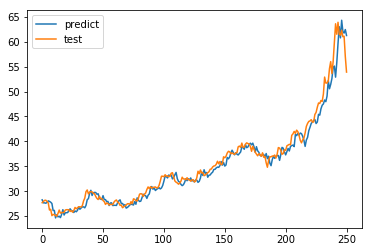

In [551]:
# plot
from matplotlib import pyplot
pyplot.plot(inv_test_predict, label='predict')
pyplot.plot(inv_test_y, label='test')
pyplot.legend()
pyplot.show()

# Classification

In [109]:
df = df3[['Close']]
df

,Close
Date/Time,
2006-01-19,4.42
2006-01-20,4.51
2006-01-23,4.38
2006-01-24,4.34
2006-01-25,4.42
2006-01-26,4.46
2006-01-27,4.42
2006-02-06,4.42
2006-02-07,4.51


In [110]:
values = df.values
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)
scaled

array([[  3.80119309e-04],
       [  8.07754695e-04],
       [  1.90060586e-04],
       ..., 
       [  9.60562527e-01],
       [  9.51059580e-01],
       [  9.46308076e-01]], dtype=float32)

In [111]:
columns = list(df)
# frame as supervised learning
reframed = series_to_supervised(scaled,5, 3, True, columns)
reframed

,Close(t-5),Close(t-4),Close(t-3),Close(t-2),Close(t-1),Close(t),Close(t+1),Close(t+2)
5,0.000380,0.000808,0.000190,0.000000,0.000380,0.000570,0.000380,0.000380
6,0.000808,0.000190,0.000000,0.000380,0.000570,0.000380,0.000380,0.000808
7,0.000190,0.000000,0.000380,0.000570,0.000380,0.000380,0.000808,0.001188
8,0.000000,0.000380,0.000570,0.000380,0.000380,0.000808,0.001188,0.001188
9,0.000380,0.000570,0.000380,0.000380,0.000808,0.001188,0.001188,0.001188
10,0.000570,0.000380,0.000380,0.000808,0.001188,0.001188,0.001188,0.001188
11,0.000380,0.000380,0.000808,0.001188,0.001188,0.001188,0.001188,0.001188
12,0.000380,0.000808,0.001188,0.001188,0.001188,0.001188,0.001188,0.000998
13,0.000808,0.001188,0.001188,0.001188,0.001188,0.001188,0.000998,0.001188
14,0.001188,0.001188,0.001188,0.001188,0.001188,0.000998,0.001188,0.002186


In [112]:
# drop columns we dont want to predict
drop_list = [0,1,2,3,4,6]
reframed_y = reframed.drop(reframed.columns[drop_list], axis=1)
reframed_y

,Close(t),Close(t+2)
5,0.000570,0.000380
6,0.000380,0.000808
7,0.000380,0.001188
8,0.000808,0.001188
9,0.001188,0.001188
10,0.001188,0.001188
11,0.001188,0.001188
12,0.001188,0.000998
13,0.001188,0.001188
14,0.000998,0.002186


In [113]:
def f(x):
    if x[0] < x[1]:
        return 1
    else:
        return 0

In [114]:
reframed_y['Trend'] = reframed_y.apply(f, axis=1)
reframed_y

,Close(t),Close(t+2),Trend
5,0.000570,0.000380,0
6,0.000380,0.000808,1
7,0.000380,0.001188,1
8,0.000808,0.001188,1
9,0.001188,0.001188,0
10,0.001188,0.001188,0
11,0.001188,0.001188,0
12,0.001188,0.000998,0
13,0.001188,0.001188,0
14,0.000998,0.002186,1


In [115]:
reframed_y = reframed_y[['Trend']]
reframed_y

,Trend
5,0
6,1
7,1
8,1
9,0
10,0
11,0
12,0
13,0
14,1


In [116]:
df3

,Open,High,Low,Close,Volume
Date/Time,,,,,
2006-01-19,4.42,4.42,4.42,4.42,109350
2006-01-20,4.51,4.59,4.51,4.51,157840
2006-01-23,4.51,4.51,4.38,4.38,81400
2006-01-24,4.38,4.38,4.34,4.34,66000
2006-01-25,4.34,4.42,4.34,4.42,57220
2006-01-26,4.46,4.46,4.46,4.46,18750
2006-01-27,4.42,4.42,4.42,4.42,25630
2006-02-06,4.42,4.42,4.42,4.42,25190
2006-02-07,4.51,4.51,4.51,4.51,138720


In [103]:
values = df3.values
#ensure all data is float
values = values.astype('float32')
# normalize features
scaler = StandardScaler()
scaled = scaler.fit_transform(values)
columns = list(df3)
# frame as supervised learning
reframed = series_to_supervised(scaled,5, 3, True, columns)
# drop columns we dont want to predict
drop_list = [25,26,27,28,29,30,31,32,33,34,35,36,37,39]
reframed.drop(reframed.columns[drop_list], axis=1, inplace=True)
reframed

,Open(t-5),High(t-5),Low(t-5),Close(t-5),Volume(t-5),Open(t-4),High(t-4),Low(t-4),Close(t-4),Volume(t-4),...,High(t-2),Low(t-2),Close(t-2),Volume(t-2),Open(t-1),High(t-1),Low(t-1),Close(t-1),Volume(t-1),Close(t+2)
5,-0.969349,-0.969983,-0.967829,-0.968584,-0.437333,-0.967438,-0.966408,-0.965903,-0.966676,-0.335597,...,-0.970824,-0.969541,-0.970280,-0.528285,-0.971048,-0.969983,-0.969541,-0.968584,-0.546706,-0.968584
6,-0.967438,-0.966408,-0.965903,-0.966676,-0.335597,-0.967438,-0.968090,-0.968685,-0.969432,-0.495974,...,-0.969983,-0.969541,-0.968584,-0.546706,-0.968500,-0.969142,-0.966973,-0.967736,-0.627419,-0.966676
7,-0.967438,-0.968090,-0.968685,-0.969432,-0.495974,-0.970199,-0.970824,-0.969541,-0.970280,-0.528285,...,-0.969142,-0.966973,-0.967736,-0.627419,-0.969349,-0.969983,-0.967829,-0.968584,-0.612984,-0.964980
8,-0.970199,-0.970824,-0.969541,-0.970280,-0.528285,-0.971048,-0.969983,-0.969541,-0.968584,-0.546706,...,-0.969983,-0.967829,-0.968584,-0.612984,-0.969349,-0.969983,-0.967829,-0.968584,-0.613908,-0.964980
9,-0.971048,-0.969983,-0.969541,-0.968584,-0.546706,-0.968500,-0.969142,-0.966973,-0.967736,-0.627419,...,-0.969983,-0.967829,-0.968584,-0.613908,-0.967438,-0.968090,-0.965903,-0.966676,-0.375713,-0.964980
10,-0.968500,-0.969142,-0.966973,-0.967736,-0.627419,-0.969349,-0.969983,-0.967829,-0.968584,-0.612984,...,-0.968090,-0.965903,-0.966676,-0.375713,-0.965739,-0.966408,-0.964191,-0.964980,-0.332534,-0.964980
11,-0.969349,-0.969983,-0.967829,-0.968584,-0.612984,-0.969349,-0.969983,-0.967829,-0.968584,-0.613908,...,-0.966408,-0.964191,-0.964980,-0.332534,-0.965739,-0.966408,-0.964191,-0.964980,-0.344535,-0.964980
12,-0.969349,-0.969983,-0.967829,-0.968584,-0.613908,-0.967438,-0.968090,-0.965903,-0.966676,-0.375713,...,-0.966408,-0.964191,-0.964980,-0.344535,-0.965739,-0.966408,-0.965903,-0.964980,-0.396840,-0.965828
13,-0.967438,-0.968090,-0.965903,-0.966676,-0.375713,-0.965739,-0.966408,-0.964191,-0.964980,-0.332534,...,-0.966408,-0.965903,-0.964980,-0.396840,-0.965739,-0.966408,-0.964191,-0.964980,-0.344346,-0.964980
14,-0.965739,-0.966408,-0.964191,-0.964980,-0.332534,-0.965739,-0.966408,-0.964191,-0.964980,-0.344535,...,-0.966408,-0.964191,-0.964980,-0.344346,-0.965739,-0.966408,-0.964191,-0.964980,-0.429130,-0.960527


In [104]:
# drop columns we dont want to predict
drop_list = [25]
reframed_X = reframed.drop(reframed.columns[drop_list], axis=1)
reframed_X

,Open(t-5),High(t-5),Low(t-5),Close(t-5),Volume(t-5),Open(t-4),High(t-4),Low(t-4),Close(t-4),Volume(t-4),...,Open(t-2),High(t-2),Low(t-2),Close(t-2),Volume(t-2),Open(t-1),High(t-1),Low(t-1),Close(t-1),Volume(t-1)
5,-0.969349,-0.969983,-0.967829,-0.968584,-0.437333,-0.967438,-0.966408,-0.965903,-0.966676,-0.335597,...,-0.970199,-0.970824,-0.969541,-0.970280,-0.528285,-0.971048,-0.969983,-0.969541,-0.968584,-0.546706
6,-0.967438,-0.966408,-0.965903,-0.966676,-0.335597,-0.967438,-0.968090,-0.968685,-0.969432,-0.495974,...,-0.971048,-0.969983,-0.969541,-0.968584,-0.546706,-0.968500,-0.969142,-0.966973,-0.967736,-0.627419
7,-0.967438,-0.968090,-0.968685,-0.969432,-0.495974,-0.970199,-0.970824,-0.969541,-0.970280,-0.528285,...,-0.968500,-0.969142,-0.966973,-0.967736,-0.627419,-0.969349,-0.969983,-0.967829,-0.968584,-0.612984
8,-0.970199,-0.970824,-0.969541,-0.970280,-0.528285,-0.971048,-0.969983,-0.969541,-0.968584,-0.546706,...,-0.969349,-0.969983,-0.967829,-0.968584,-0.612984,-0.969349,-0.969983,-0.967829,-0.968584,-0.613908
9,-0.971048,-0.969983,-0.969541,-0.968584,-0.546706,-0.968500,-0.969142,-0.966973,-0.967736,-0.627419,...,-0.969349,-0.969983,-0.967829,-0.968584,-0.613908,-0.967438,-0.968090,-0.965903,-0.966676,-0.375713
10,-0.968500,-0.969142,-0.966973,-0.967736,-0.627419,-0.969349,-0.969983,-0.967829,-0.968584,-0.612984,...,-0.967438,-0.968090,-0.965903,-0.966676,-0.375713,-0.965739,-0.966408,-0.964191,-0.964980,-0.332534
11,-0.969349,-0.969983,-0.967829,-0.968584,-0.612984,-0.969349,-0.969983,-0.967829,-0.968584,-0.613908,...,-0.965739,-0.966408,-0.964191,-0.964980,-0.332534,-0.965739,-0.966408,-0.964191,-0.964980,-0.344535
12,-0.969349,-0.969983,-0.967829,-0.968584,-0.613908,-0.967438,-0.968090,-0.965903,-0.966676,-0.375713,...,-0.965739,-0.966408,-0.964191,-0.964980,-0.344535,-0.965739,-0.966408,-0.965903,-0.964980,-0.396840
13,-0.967438,-0.968090,-0.965903,-0.966676,-0.375713,-0.965739,-0.966408,-0.964191,-0.964980,-0.332534,...,-0.965739,-0.966408,-0.965903,-0.964980,-0.396840,-0.965739,-0.966408,-0.964191,-0.964980,-0.344346
14,-0.965739,-0.966408,-0.964191,-0.964980,-0.332534,-0.965739,-0.966408,-0.964191,-0.964980,-0.344535,...,-0.965739,-0.966408,-0.964191,-0.964980,-0.344346,-0.965739,-0.966408,-0.964191,-0.964980,-0.429130


In [105]:
# split data
n_train = int(len(reframed_X) * 0.7)
n_val = int(len(reframed_X) * 0.2)
train_X = reframed_X.values[:n_train, :]
val_X = reframed_X.values[n_train:n_train+n_val, :]
test_X = reframed_X.values[n_train+n_val:, :]
train_y = reframed_y.values[:n_train, :]
val_y = reframed_y.values[n_train:n_train+n_val, :]
test_y = reframed_y.values[n_train+n_val:, :]
print train_X.shape, train_y.shape, val_X.shape, val_y.shape, test_X.shape, test_y.shape

(2095, 25) (2095, 1) (598, 25) (598, 1) (300, 25) (300, 1)


In [106]:
# reshape input tobe [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], 1))
val_X = val_X.reshape((val_X.shape[0], val_X.shape[1], 1))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], 1))
print train_X.shape, train_y.shape, val_X.shape, val_y.shape, test_X.shape, test_y.shape

(2095, 25, 1) (2095, 1) (598, 25, 1) (598, 1) (300, 25, 1) (300, 1)


In [107]:
# network
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(LSTM(128, activation='tanh'))
model.add(Dense(train_y.shape[1], activation='sigmoid'))
opt = keras.optimizers.Adagrad(lr=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])

In [108]:
# fit network
history = model.fit(train_X, train_y, epochs=300, batch_size=32, validation_data=(val_X, val_y))

Train on 2095 samples, validate on 598 samples
Epoch 1/300
2095/2095 [==============================] - 5s - loss: 0.6983 - acc: 0.5547 - val_loss: 0.6881 - val_acc: 0.5736
Epoch 2/300
2095/2095 [==============================] - 4s - loss: 0.6835 - acc: 0.5675 - val_loss: 0.7066 - val_acc: 0.5736
Epoch 3/300
2095/2095 [==============================] - 4s - loss: 0.6836 - acc: 0.5675 - val_loss: 0.7131 - val_acc: 0.5736
Epoch 4/300
2095/2095 [==============================] - 4s - loss: 0.6823 - acc: 0.5675 - val_loss: 0.7363 - val_acc: 0.5736
Epoch 5/300
2095/2095 [==============================] - 4s - loss: 0.6832 - acc: 0.5675 - val_loss: 0.7183 - val_acc: 0.5736
Epoch 6/300
2095/2095 [==============================] - 5s - loss: 0.6831 - acc: 0.5675 - val_loss: 0.7235 - val_acc: 0.5736
Epoch 7/300
2095/2095 [==============================] - 6s - loss: 0.6830 - acc: 0.5675 - val_loss: 0.7111 - val_acc: 0.5736
Epoch 8/300
2095/2095 [==============================] - 4s - loss: 0.6

 480/2095 [=====>........................] - ETA: 3s - loss: 0.6705 - acc: 0.5771

KeyboardInterrupt: 

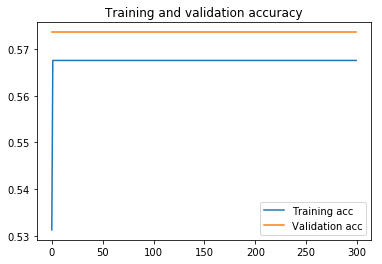

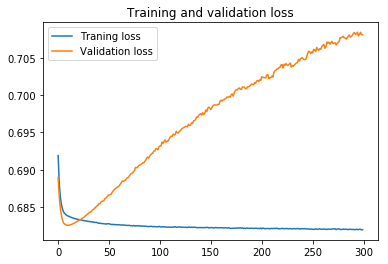

In [82]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(loss, label='Traning loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [341]:
prediction = model.predict_classes(test_X)
prediction

288/299 [===========================>..] - ETA: 0s

array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [343]:
test_y

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [342]:
count = 0
for i in range (0, len(test_y)):
    if test_y[i] == prediction[i]:
        count+=1
print count
print count*100/len(test_y)

145
48
